# 6. Data Prepration
Preprocessing time series data is a crucial step in preparing the data for analysis. It involves cleaning, transforming, and organizing the data so that it is ready for modeling. Here are some common preprocessing techniques used for time series data:

## 6.1 Data cleaning
This involves identifying and correcting errors in the data, such as missing values or outliers. These errors can cause problems when modeling the data, and it is important to address them before proceeding.

In [ ]:
# download dataset
!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv


--2023-09-09 13:47:29--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67921 (66K) [text/plain]
Saving to: ‘daily-min-temperatures.csv.2’

daily-min-temperatu 100%[===================>]  66.33K  --.-KB/s    in 0.008s  

2023-09-09 13:47:29 (8.18 MB/s) - ‘daily-min-temperatures.csv.2’ saved [67921/67921]



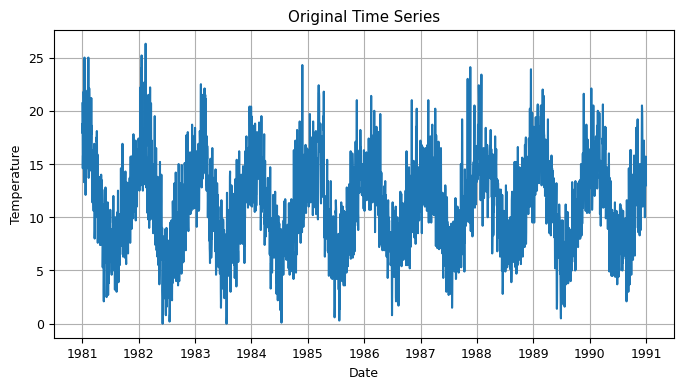

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load time series data from downloaded file
data = pd.read_csv('daily-min-temperatures.csv', index_col='Date', parse_dates=True)

# Set font size
plt.rcParams.update({'font.size': 9})

# Plot the data
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(data['Temp'], label='Original')

plt.title("Original Time Series")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.grid(True)

plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Data cleaning
data_cl = data.dropna() # Remove missing values
print(f'dataset have {len(data)-len(data_cl)}  NAN point')

dataset have 0  NAN point


## 6.2 Time alignment
 Time alignment involves ensuring that the data is aligned correctly with the time index. This is important because many time series models rely on the assumption that the data is sampled at regular intervals.

In [ ]:
# Remove duplicate indices
data_d_r = data_cl[~data_cl.index.duplicated(keep='first')]
print(f'dataset have {len(data_cl)-len(data_d_r)}  duplicate point')

# Time alignment
data = data_d_r.resample('D').mean() # Resample to daily frequency

dataset have 0  duplicate point


## 6.3 Resampling
Resampling involves changing the time interval at which the data is sampled. This can be useful for aggregating data to a coarser or finer time scale.

## 6.4 Smoothing
Smoothing involves reducing noise in the data by averaging out small fluctuations. This can make it easier to identify trends in the data.

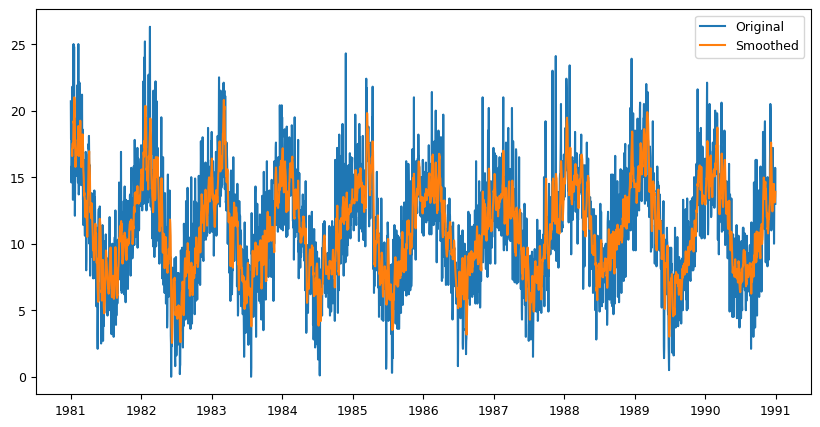

In [ ]:
# Smoothing
fig, ax = plt.subplots(figsize=(10,5))
data['smoothed'] = data['Temp'].rolling(window=7).mean() # Compute rolling average with window size of 7
ax.plot(data['Temp'], label='Original')
ax.plot(data['smoothed'], label='Smoothed')
ax.legend(loc='best')
plt.show()

## 6.5 Differencing
Differencing involves subtracting the previous value in the time series from the current value. This can help to remove trends or seasonality in the data.

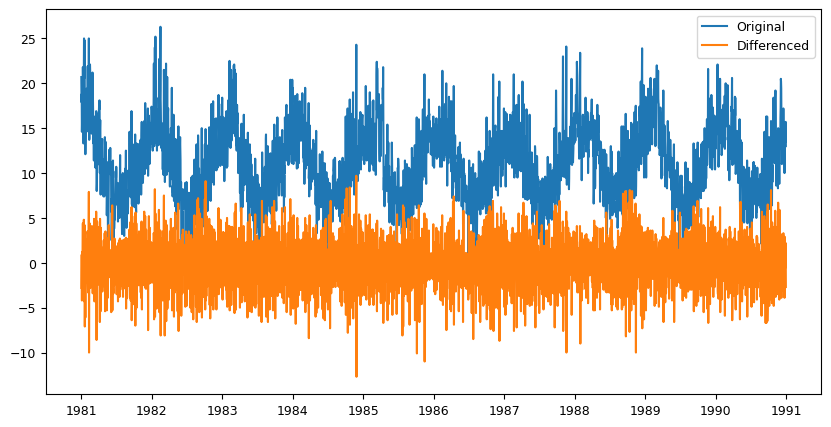

In [ ]:
# Differencing
data['diff'] = data['Temp'].diff() # Compute first-order difference
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(data['Temp'], label='Original')
ax.plot(data['diff'], label='Differenced')
ax.legend(loc='best')
plt.show()

## 6.6 Normalization
Normalization involves scaling the data to a fixed range, such as between 0 and 1. This can make it easier to compare different time series that may have different scales.

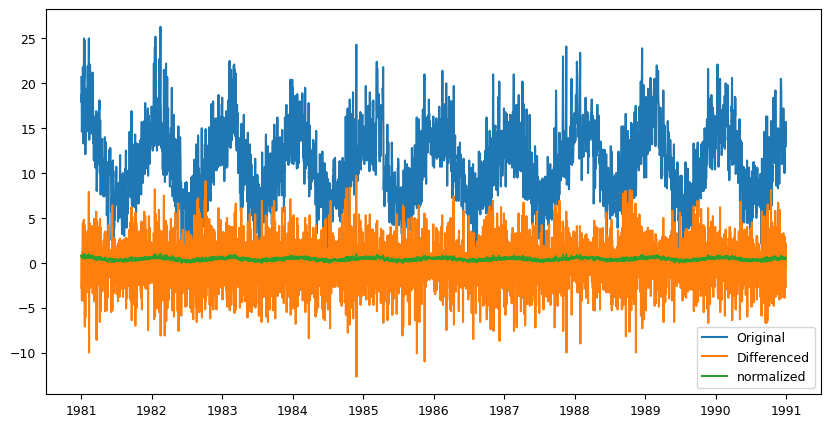

In [ ]:
# Normalization
data['normalized'] = (data['Temp'] - data['Temp'].min()) / (data['Temp'].max() - data['Temp'].min())

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(data['Temp'], label='Original')
ax.plot(data['diff'], label='Differenced')
ax.plot(data['normalized'], label='normalized')
ax.legend(loc='best')
plt.show()

## 6.7 Feature engineering
Feature engineering involves creating new features from the existing data that may be useful for modeling. For example, creating lagged variables or rolling windows can be useful for capturing temporal dependencies in the data.

These preprocessing techniques are important because they can help to ensure that the data is ready for modeling. By addressing issues such as missing values, outliers, and time misalignments, the resulting models can be more accurate and reliable. Additionally, techniques such as smoothing, differencing, and feature engineering can help to extract useful information from the data that can be used for forecasting or other types of analysis.


you can see a sample code that perform these steps on a time-series dataset.This dataset contains daily minimum temperatures from 1981 to 1990, recorded at the Melbourne Regional Office in Australia. The dataset has a daily frequency and no missing values, making it a good candidate for testing the time alignment, smoothing, differencing, normalization, and feature engineering techniques.


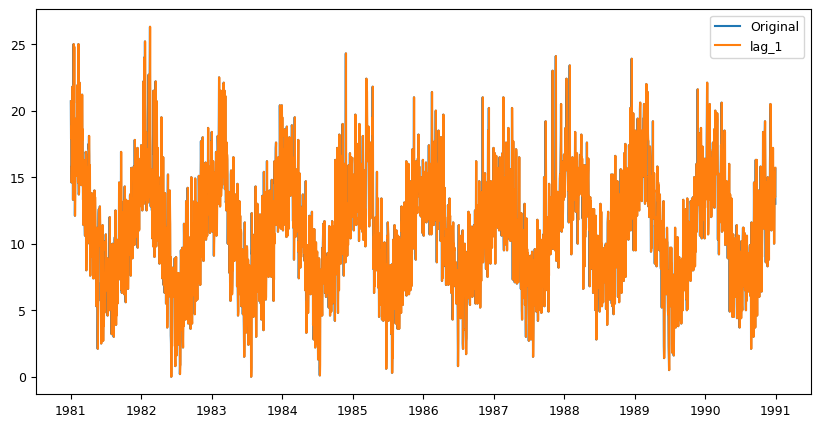

In [ ]:
# Feature engineering
data['lag_1'] = data['Temp'].shift(1) # Create lagged variable with lag of 1 day
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(data['Temp'], label='Original')
ax.plot(data['lag_1'], label='lag_1')
ax.legend(loc='best')
plt.show()

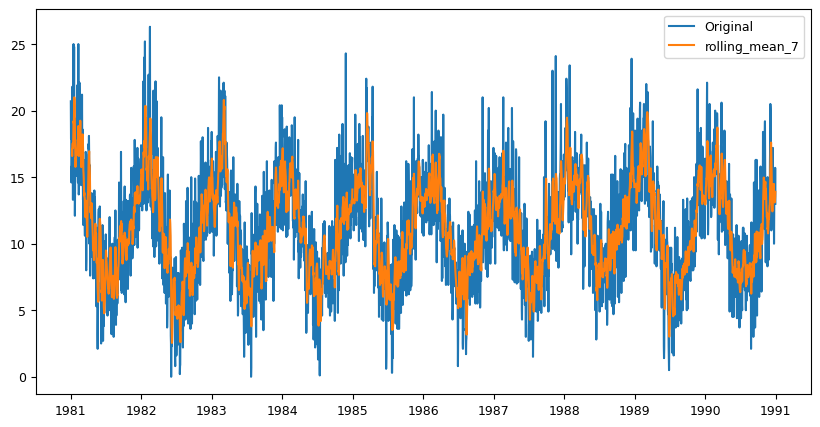

In [ ]:
# Feature engineering
data['rolling_mean_7'] = data['Temp'].rolling(window=7).mean() # Create rolling window with window size of 7 days
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(data['Temp'], label='Original')
ax.plot(data['rolling_mean_7'], label='rolling_mean_7')
ax.legend(loc='best')
plt.show()

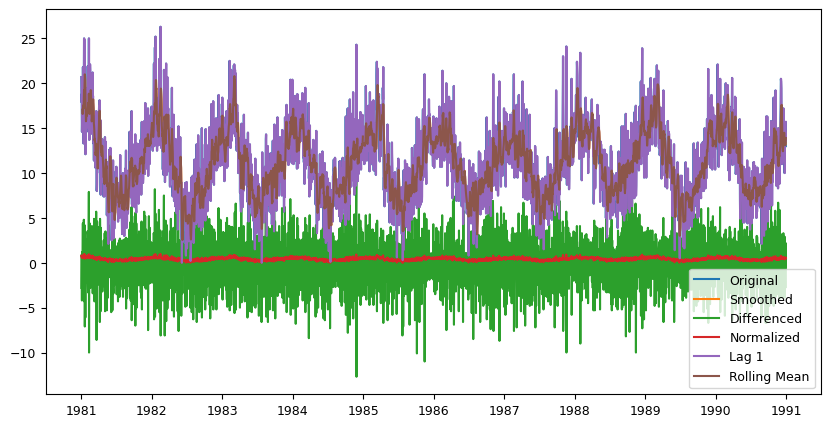

In [ ]:
# Plot the data
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(data['Temp'], label='Original')
ax.plot(data['smoothed'], label='Smoothed')
ax.plot(data['diff'], label='Differenced')
ax.plot(data['normalized'], label='Normalized')
ax.plot(data['lag_1'], label='Lag 1')
ax.plot(data['rolling_mean_7'], label='Rolling Mean')
ax.legend(loc='best')
plt.show()